The dataset contains 18 variables (9 booleans, 5 strings and 4 decimals). In machine learning projects, "HeartDisease" can be used as the explonatory variable, but note that the classes are heavily unbalanced.

# Data Preprocessing
- Missing Value Analysis
- Duplicates
- Outlier Analysis
- Feature Selection
- Encoding
- Standardization
- Test Train Split

In [136]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import chi2_contingency
from scipy.stats import pearsonr

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

import warnings
warnings.filterwarnings('ignore')

In [137]:
df = pd.read_csv('heart_2020_cleaned.csv') # Read the cleaned dataset
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [138]:
df # Display the dataset

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [139]:
# Check the shape and info of the dataset
print("Shape of dataset:", df.shape)
df.info()

Shape of dataset: (319795, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  ob

- *Inferences*:
    - **Heart Disease** - Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
    - **BMI** - Body Mass Index 
    - **Smoking** - Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
    - **AlcoholDrinking** - Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)
    - **Stroke** - (Ever told) (you had) a stroke?
    - **PhysicalHealth** - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30
    - **MentalHealth** - Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?
    - **DiffWalk** - Serious difficulty walking or climbing stairs
    - **Sex** - Male / Female
    - **AgeCategory** - Fourteen-level age category

In [140]:
df.describe() # Check the statistical summary of the dataset

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


### Exploring categorical variables

In [141]:
df.describe(include='object') # Check the statistical summary of the dataset for categorical variables

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


In [142]:
# Select continuous variables
continuous_vars = df.select_dtypes('float64').columns
print(continuous_vars)
# Select categorical variables
categorical_vars = df.select_dtypes('object').columns
print(categorical_vars)

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')
Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


This code plots the frequency of each categorical variable in the dataset. The plots are separated by the values of the target variable, HeartDisease. The purpose of the code is to get an idea of the distribution of each categorical variable in the dataset, and to see if there are any differences in the distribution of each categorical variable between the two values of the target variable.

catplot() method is used to plot categorical plots. 

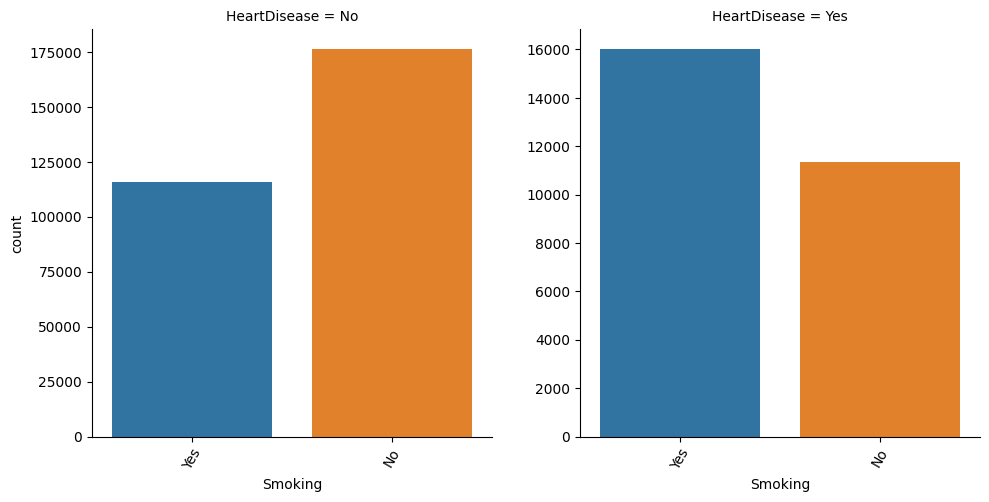

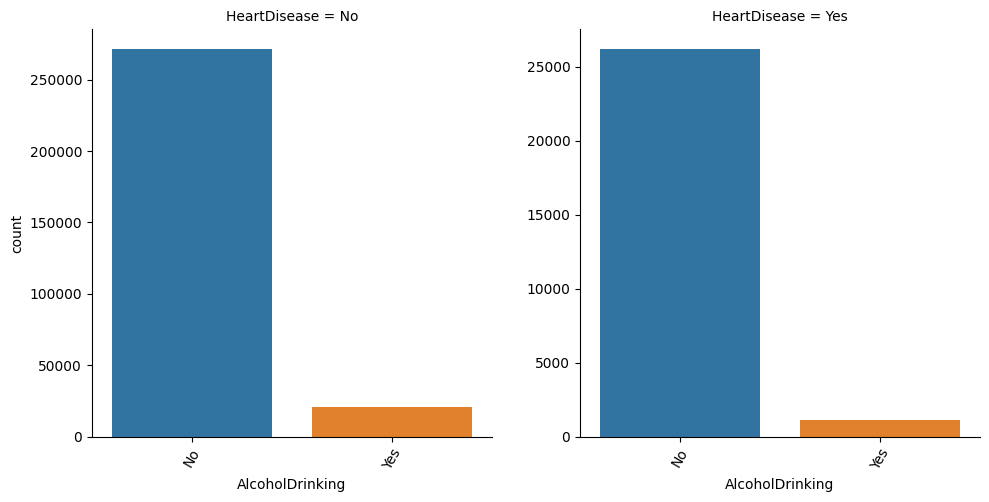

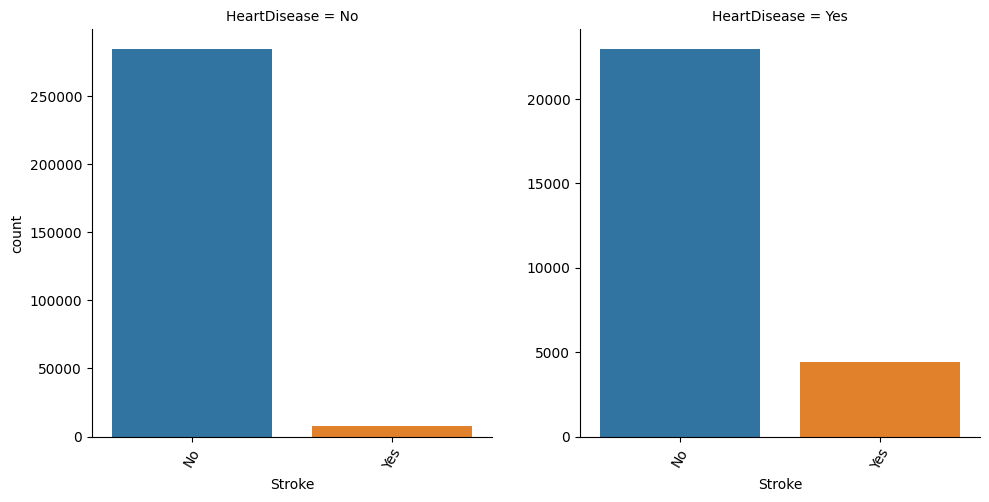

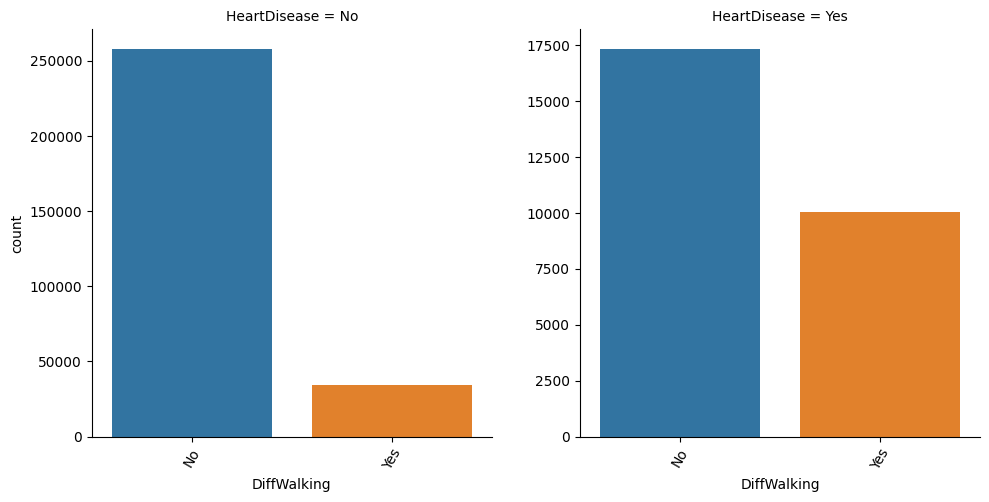

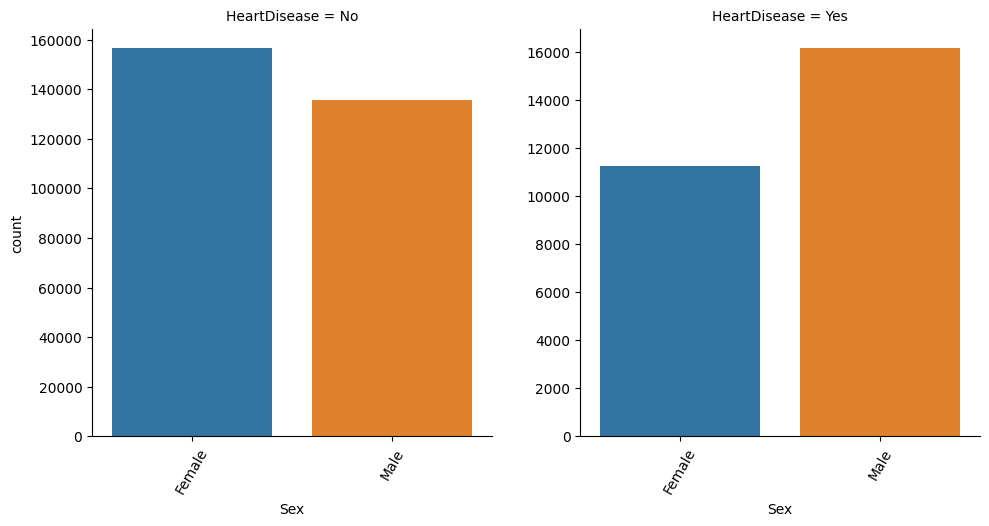

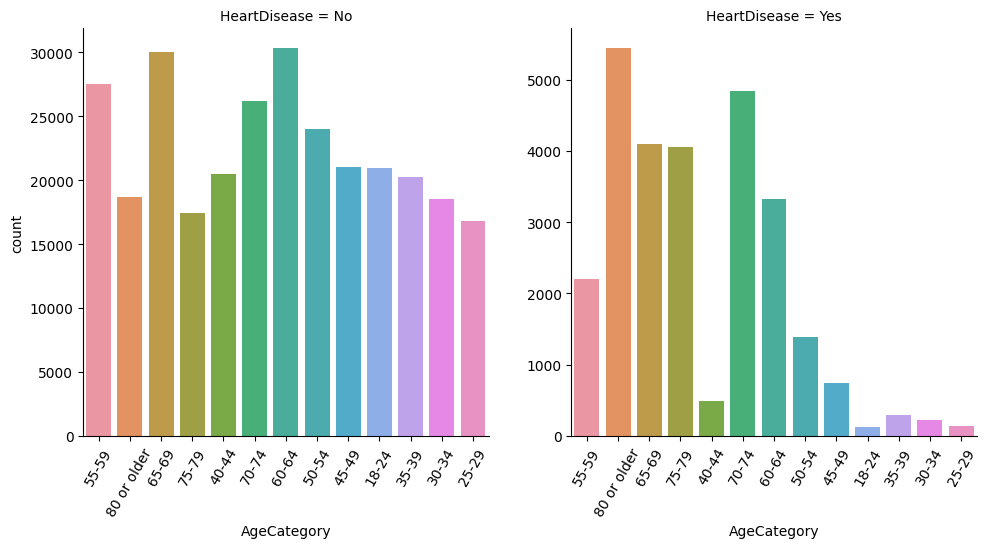

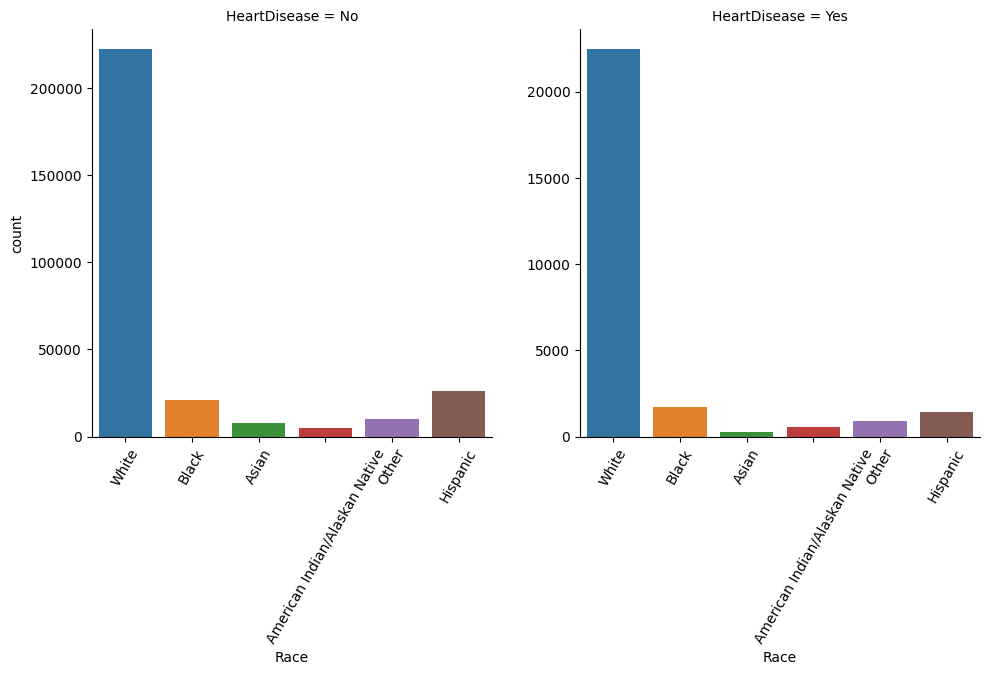

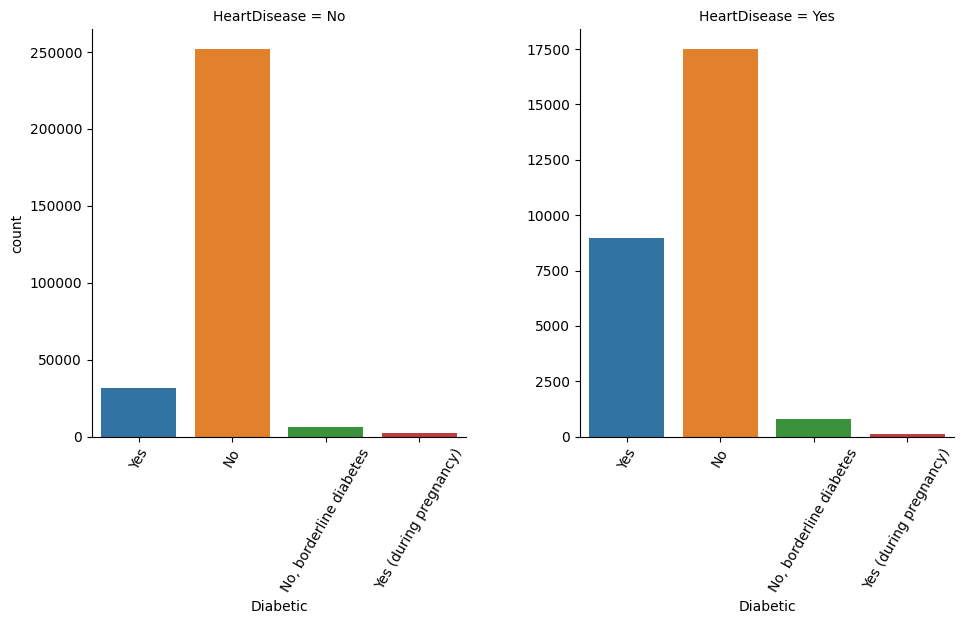

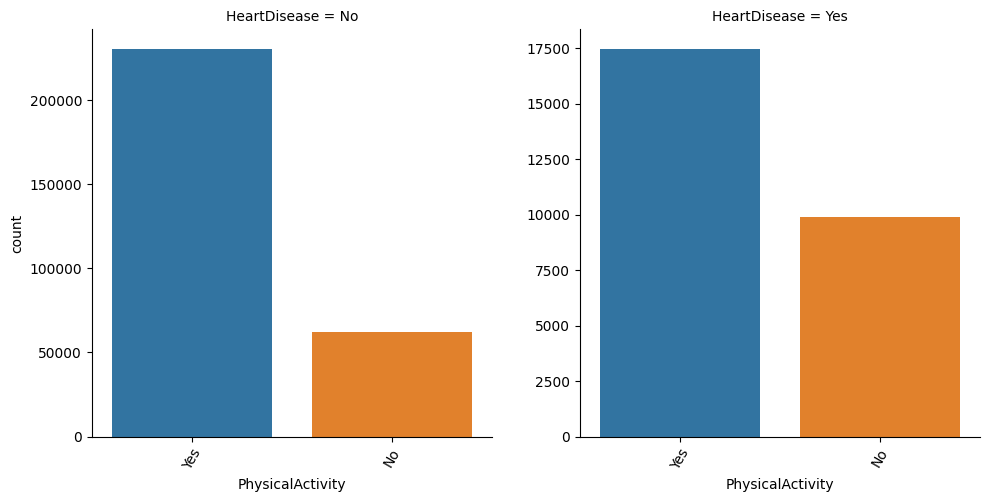

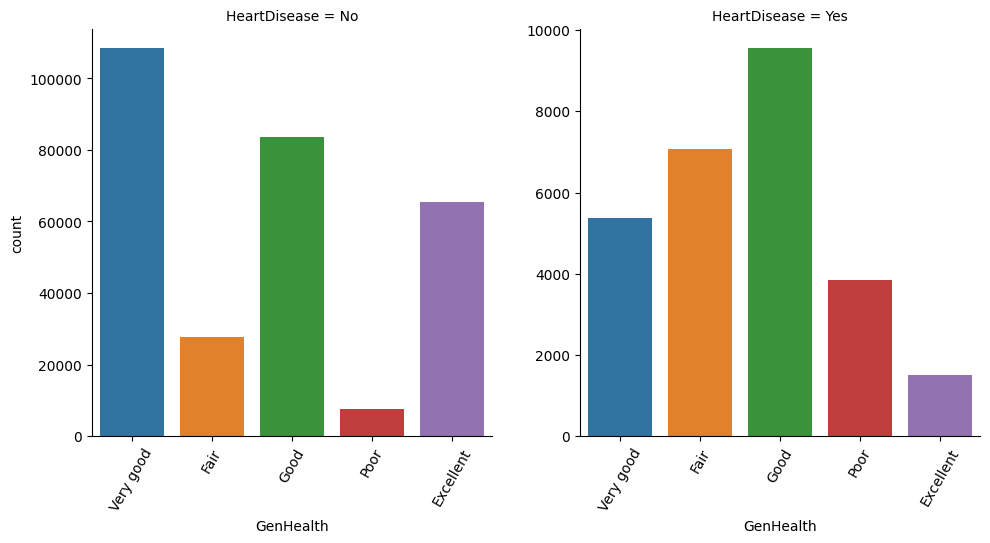

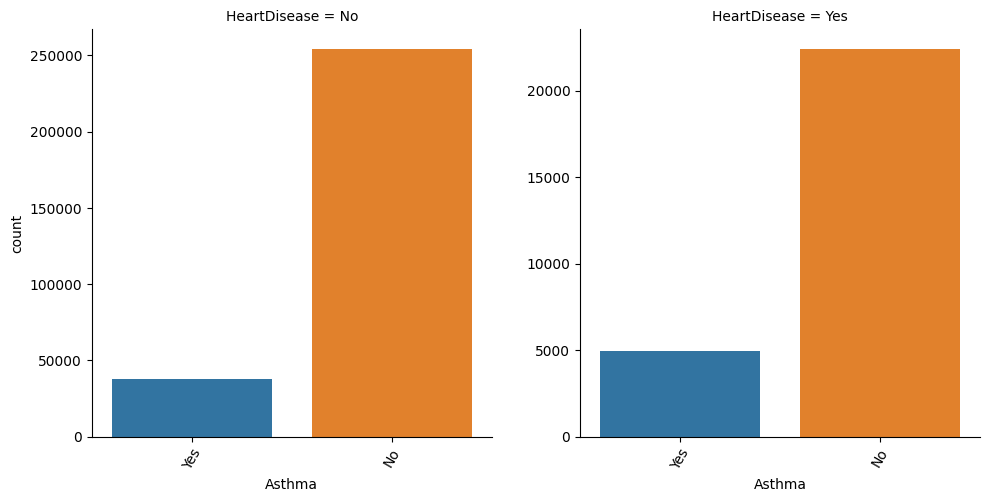

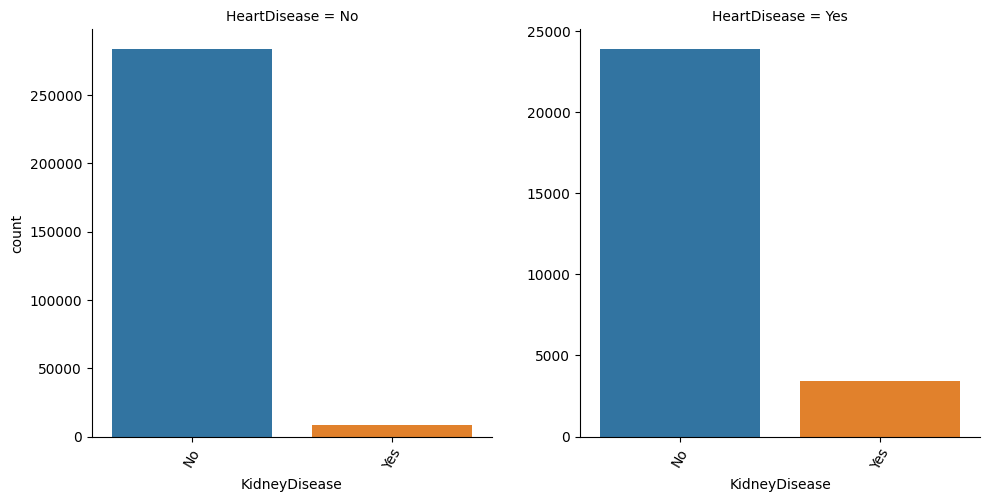

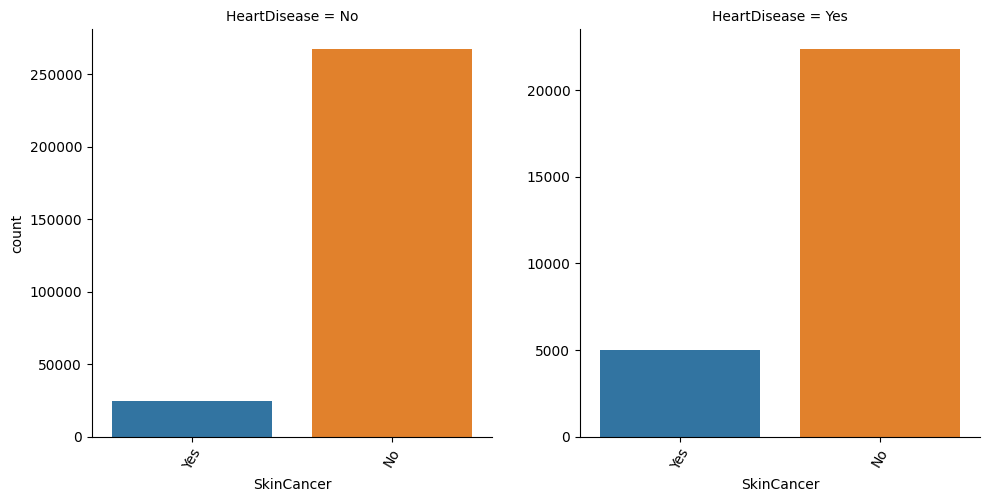

In [143]:
for col in categorical_vars[1:]: # Plot the categorical variables against the target variable
    g = sns.catplot(x=col, col='HeartDisease', kind='count', data=df, sharey=False)
    g.set_xticklabels(rotation=60)

- **Smoking**: We can see that the composition of the subset of population with HeartDisease has a higher proportion of smokers.
- **Alcohol Drinking**: The distribution of Yes/No is almost the same in both sets with and without HeartDisease.
- **Stroke**: It is clear that the population with HeartDisease has a higher proportion of people who have had a stroke, which suggests a correlation between the two.
- **DiffWalking**: There are a higher number of people who have Difficulty Walking with HeartDisease as opposed to those who do not.
- **Sex**: It appears that Males make up a higher proportion of the population with HeartDisease
- **AgeCategory**: We see that the occurences of HeartDisease are more common in older age groups
- **Race**: The distribution of Race with respect to HeartDisease is nearly the same, suggesting weak correlation
- **Diabetic**: There is a higher proportion of diabetics in subset of people with HeartDisease
- **PhysicalActivity**: There are more physically inactive people with HeartDisease as compared to physically active people
- **GenHealth**: People without HeartDisease have better General Health than those with HeartDisease
- **Asthma**: The distribution for with/without HeartDisease is almost the same, suggesting weak correlation
- **KidneyDisease**: There is a bigger fraction of people with KidneyDisease and HealthDisease as compared to those without HeartDisease
- **SkinCancer**: There is a bigger fraction of people with SkinCancer and HealthDisease as compared to those without HeartDisease

### 1. Missing Value Analysis

In [144]:
df.isnull().sum() # Check for missing values

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

### 2. Duplicates

In [145]:
print("Initial shape:", df.shape) # Check the shape of the dataset before dropping the missing values
print("Duplicates in dataset:", df.duplicated().sum()) # Check for duplicates in the dataset

Initial shape: (319795, 18)
Duplicates in dataset: 18078


In [146]:
df.drop_duplicates(inplace=True) # Drop duplicates in the dataset

print("New shape:", df.shape) # Check the shape of the dataset after dropping the missing values
print("Duplicates in dataset:", df.duplicated().sum()) # Check for duplicates in the dataset

New shape: (301717, 18)
Duplicates in dataset: 0


### 3. Outlier Analysis

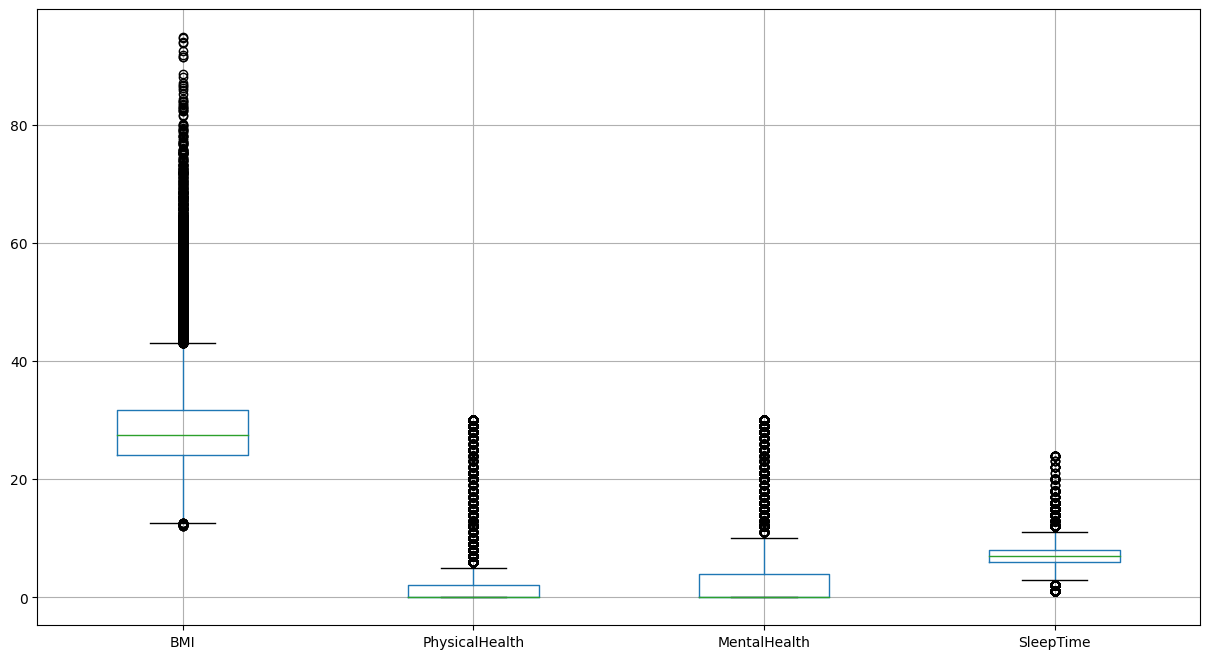

In [147]:
plt.figure(figsize=(15,8))
df.boxplot(column=list(continuous_vars)) # Plot boxplots for the continuous variables to check for outliers
plt.show()

In [148]:
# Function to calculate the upper and lower limits for outliers
def outlier_lims(col):
    Q3,Q1 = np.percentile(col, [75,25])
    IQR = Q3-Q1
    upper_lim = Q3 + 1.5*IQR
    lower_lim = Q1 - 1.5*IQR
    return upper_lim, lower_lim

This code finds the upper and lower limits of outliers for each continuous variable, and then calculates the percentage of outliers for each variable. It then prints the name of the variable, the upper limit, the lower limit, and the percentage of outliers as output.

In [149]:
for col in continuous_vars:
    print("--------------------------------------------------")
    print("Column:", col)
    
    UL,LL = outlier_lims(df[col])
    print("Upper Limit =", UL)
    print("Lower Limit =", LL)
    
    total_outliers = len(df.loc[df[col]<LL,col]) + len(df.loc[df[col]>UL,col])
    percent = (total_outliers / len(df.index) )*100
    
    print("Percentage of Outliers=", percent)
    print("-------------------------------------------------- \n")

--------------------------------------------------
Column: BMI
Upper Limit = 43.08
Lower Limit = 12.600000000000005
Percentage of Outliers= 2.9514412512387436
-------------------------------------------------- 

--------------------------------------------------
Column: PhysicalHealth
Upper Limit = 5.0
Lower Limit = -3.0
Percentage of Outliers= 15.622586728623181
-------------------------------------------------- 

--------------------------------------------------
Column: MentalHealth
Upper Limit = 10.0
Lower Limit = -6.0
Percentage of Outliers= 13.162334240364315
-------------------------------------------------- 

--------------------------------------------------
Column: SleepTime
Upper Limit = 11.0
Lower Limit = 3.0
Percentage of Outliers= 1.5053841845172795
-------------------------------------------------- 



**Inference**
- For BMI and SleepTime, % of outliers is very low => can delete those records
- For PhysicalHeath and MentalHealth, % of outliers is too great to delete records

In [150]:
df.select_dtypes(include='float64').skew() # Check the skewness of the continuous variables

BMI               1.297737
PhysicalHealth    2.501000
MentalHealth      2.237470
SleepTime         0.697224
dtype: float64

**Inference**
- PhysicalHealth and MentalHealth are greately positively skewed. Therefore, can apply log transformation

In [151]:
#dropping records for BMI and SleepTime outliers
for col in ['BMI', 'SleepTime']:
    UL,LL = outlier_lims(df[col])
    df.loc[df[col]<LL,col]=np.nan
    df.loc[df[col]>UL,col]=np.nan

df.dropna(subset=['BMI', 'SleepTime'], inplace=True)
df.reset_index(drop=True, inplace=True)

#using log transformation for PhysicalHealth and MentalHealth
df[['PhysicalHealth','MentalHealth']] = np.log1p(df[['PhysicalHealth','MentalHealth']])

In [152]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,1.386294,3.433987,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.000000,0.000000,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,3.044522,3.433987,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.000000,0.000000,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,3.367296,0.000000,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288491,No,23.38,No,No,No,0.000000,0.000000,No,Female,60-64,Hispanic,No,Yes,Excellent,6.0,No,No,No
288492,No,22.22,No,No,No,0.000000,0.000000,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
288493,Yes,27.41,Yes,No,No,2.079442,0.000000,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
288494,No,29.84,Yes,No,No,0.000000,0.000000,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No


In [153]:
df.select_dtypes(include='float64').skew() # Check the skewness of the continuous variables after dropping the outliers

BMI               0.489741
PhysicalHealth    1.565659
MentalHealth      1.150896
SleepTime        -0.274924
dtype: float64

## 4. Feature Selection

### 4.1 Continuous Variables

This code will display a heatmap of the correlation between all of the float64 columns in the dataframe. It does this by first selecting only the float64 columns, then calling the corr() method on them to get the correlation values, and then finally using seaborn to create a heatmap of the correlation values.


![Alt text](image-2.png)

                     BMI  PhysicalHealth  MentalHealth  SleepTime
BMI             1.000000        0.075499      0.015184  -0.055475
PhysicalHealth  0.075499        1.000000      0.266002  -0.098170
MentalHealth    0.015184        0.266002      1.000000  -0.148908
SleepTime      -0.055475       -0.098170     -0.148908   1.000000



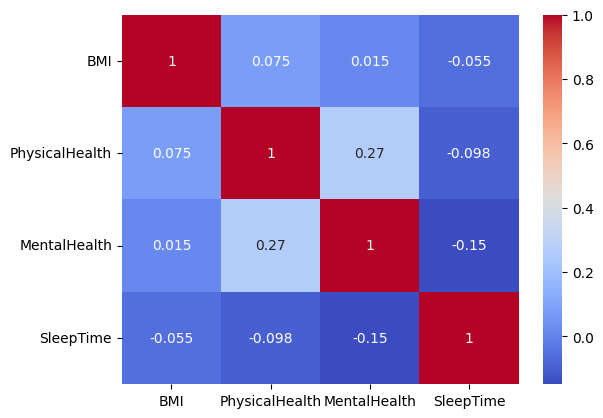

In [154]:
print(df.select_dtypes(include='float64').corr(), end='\n\n')
sns.heatmap(df.select_dtypes(include='float64').corr(), annot=True, cmap='coolwarm')
plt.show()

This shows that PhysicalHealth and MentalHealth are related. However, none of these values are high enough to drop a feature altogether.

Pearson Correlation Coefficient is used to find the correlation between two variables. It has a value between -1 and 1. A value of 1 indicates a perfect positive correlation, and a value of -1 indicates a perfect negative correlation. A value of 0 indicates no correlation at all.

In [155]:
numeric_columns = df.select_dtypes(include=['float64'])
for col in numeric_columns.columns:
    corr_coeff, p_value = pearsonr(df[col], df['MentalHealth'])
    print(f"Pearson Correlation between {col} and MentalHealth:")
    print("Correlation Coefficient:", corr_coeff)
    print("P-value:", p_value)
    print()

Pearson Correlation between BMI and MentalHealth:
Correlation Coefficient: 0.01518361505428421
P-value: 3.46786215594457e-16

Pearson Correlation between PhysicalHealth and MentalHealth:
Correlation Coefficient: 0.2660015674667789
P-value: 0.0

Pearson Correlation between MentalHealth and MentalHealth:
Correlation Coefficient: 0.9999999999991358
P-value: 0.0

Pearson Correlation between SleepTime and MentalHealth:
Correlation Coefficient: -0.14890824055216695
P-value: 0.0



- **BMI and MentalHealth:** There is a very weak positive correlation between BMI and MentalHealth, but it is statistically significant. However, the practical significance of this correlation is questionable.
- **PhysicalHealth and MentalHealth:** A moderate positive correlation exists between PhysicalHealth and MentalHealth, indicating that improvements in physical health tend to be associated with improvements in mental health. This correlation is highly statistically significant.
- **MentalHealth and MentalHealth:** As expected, there is a perfect positive correlation between MentalHealth and itself, which is statistically significant.
- **SleepTime and MentalHealth:** There is a weak negative correlation between SleepTime and MentalHealth, suggesting that more sleep is generally associated with better mental health. This correlation is also highly statistically significant.

### 4.2 Categorical Variables

- Formula :
    - df= (rows – 1) x (columns – 1).

In [156]:
# This code is a loop that performs a chi-square test for each categorical variable in the dataset against the target variable, HeartDisease. It prints out the contingency table and the p-value for each variable, as well as whether or not there is a significant association between the variables.

for col in categorical_vars[1:]:
    data_crosstab = pd.crosstab(df['HeartDisease'], df[col],)
    print(data_crosstab,"\n")
    try:
        # c - chi-square value, p - p-value, dof - degree of freedom, expected - expected values
        c, p, dof, expected = chi2_contingency(data_crosstab) # Perform chi-square test for the categorical variables against the target variable
        if p<.05:
            result="There is a significant association between these varibles "
        else:
            result="There is no association those varibles"
        print('- P-value is',p,"\n-",result,"\n")
    except:
        print("Can't compute chi2_contingency for",col,"\n")

Smoking           No     Yes
HeartDisease                
No            156499  106469
Yes            10565   14963 

- P-value is 0.0 
- There is a significant association between these varibles  

AlcoholDrinking      No    Yes
HeartDisease                  
No               243074  19894
Yes               24466   1062 

- P-value is 5.510264590614576e-89 
- There is a significant association between these varibles  

Stroke            No   Yes
HeartDisease              
No            255768  7200
Yes            21523  4005 

- P-value is 0.0 
- There is a significant association between these varibles  

DiffWalking       No    Yes
HeartDisease               
No            232543  30425
Yes            16650   8878 

- P-value is 0.0 
- There is a significant association between these varibles  

Sex           Female    Male
HeartDisease                
No            141278  121690
Yes            10319   15209 

- P-value is 0.0 
- There is a significant association between these var

All the features have significant association with the target variable (HeartDisease), hence can not be dropped

### 5. Encoding

In label encoding, categorical data will be represented in integer for each categories. For ordinal data type, level should be represented in order (for example: 1 is the lowest, 5 for the highest). 

In [157]:
data=df.copy()

col = data[['HeartDisease', 'Smoking', 'AlcoholDrinking','AgeCategory', 'Stroke', 'DiffWalking','Race', 'Sex','PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer','GenHealth' ,'Diabetic']]
for i in col:
    data[i] = LabelEncoder().fit_transform(data[i]) # Encode the categorical variables using LabelEncoder function
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,1.386294,3.433987,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.000000,0.000000,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,3.044522,3.433987,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.000000,0.000000,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,3.367296,0.000000,1,0,4,5,0,1,4,8.0,0,0,0


If using one-hot encoding to encode the categorical column, there will be additional columns representing each categorical. It represents categorical values as binary vectors. For example, if you one-hot encode the "Color" feature with categories "Red," "Green," and "Blue," you create three binary columns.

In [158]:
# This code is used to encode the categorical variables using OneHotEncoder function
# The categorical variables are identified by the col variable
# The drop parameter ensures that the first category is dropped to avoid multicollinearity

data2 = df.copy()

for i in col:
    data2[i] = OneHotEncoder(drop ='first').fit_transform(data2[[i]]).toarray() # Encode the categorical variables using OneHotEncoder function
data2.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,16.60,1.0,0.0,0.0,1.386294,3.433987,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0,0.0,1.0
1,0.0,20.34,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,0.0,0.0,0.0
2,0.0,26.58,1.0,0.0,0.0,3.044522,3.433987,0.0,1.0,0.0,0.0,0.0,1.0,1.0,8.0,1.0,0.0,0.0
3,0.0,24.21,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0
4,0.0,23.71,0.0,0.0,0.0,3.367296,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0,0.0,0.0


It is used for data manipulation. It converts categorical data into dummy or indicator variables.

In [159]:
#This code is encoding the categorical variables using get_dummies function

data3 = df.copy()

for i in col:
    data3 = pd.get_dummies(data3, columns=[i])
data3.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_No,HeartDisease_Yes,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,...,SkinCancer_Yes,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,16.60,1.386294,3.433987,5.0,True,False,False,True,True,False,...,True,False,False,False,False,True,False,False,True,False
1,20.34,0.000000,0.000000,7.0,True,False,True,False,True,False,...,False,False,False,False,False,True,True,False,False,False
2,26.58,3.044522,3.433987,8.0,True,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
3,24.21,0.000000,0.000000,6.0,True,False,True,False,True,False,...,True,False,False,True,False,False,True,False,False,False
4,23.71,3.367296,0.000000,8.0,True,False,True,False,True,False,...,False,False,False,False,False,True,True,False,False,False


Binary encoding represents categorical values as binary code (i.e., 0s and 1s). Each unique category is first assigned a unique integer label, similar to label encoding. Then, each integer label is converted to its binary representation, and each bit (0 or 1) becomes a separate feature.

In [160]:
data4 = df.copy()

encodr = ce.BinaryEncoder(cols=col)
data_encoded = encodr.fit_transform(data4)
data_encoded.head()

,HeartDisease_0,HeartDisease_1,BMI,Smoking_0,Smoking_1,AlcoholDrinking_0,AlcoholDrinking_1,Stroke_0,Stroke_1,PhysicalHealth,...,GenHealth_0,GenHealth_1,GenHealth_2,SleepTime,Asthma_0,Asthma_1,KidneyDisease_0,KidneyDisease_1,SkinCancer_0,SkinCancer_1
0,0,1,16.60,0,1,0,1,0,1,1.386294,...,0,0,1,5.0,0,1,0,1,0,1
1,0,1,20.34,1,0,0,1,1,0,0.000000,...,0,0,1,7.0,1,0,0,1,1,0
2,0,1,26.58,0,1,0,1,0,1,3.044522,...,0,1,0,8.0,0,1,0,1,1,0
3,0,1,24.21,1,0,0,1,0,1,0.000000,...,0,1,1,6.0,1,0,0,1,0,1
4,0,1,23.71,1,0,0,1,0,1,3.367296,...,0,0,1,8.0,1,0,0,1,1,0


## 6. Standardization

The code is used to standardize the continuous variables using StandardScaler function, and it standardizes the continuous variables by removing the mean and scaling to unit variance. <br>
![Standardization](image.png)

In [161]:
std_scaler = StandardScaler() # Standardize the continuous variables using StandardScaler function

cols = list(continuous_vars)
data[cols] = std_scaler.fit_transform(data[cols]) # Standardize the continuous variables using StandardScaler function

data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-2.084999,1,0,0,0.707383,2.325916,0,0,7,5,2,1,4,-1.636283,1,0,1
1,0,-1.389973,0,0,1,-0.571605,-0.678373,0,0,12,5,0,1,4,-0.041730,0,0,0
2,0,-0.230359,1,0,0,2.237255,2.325916,0,1,9,5,2,1,1,0.755547,1,0,0
3,0,-0.670789,0,0,0,-0.571605,-0.678373,0,0,11,5,0,0,2,-0.839007,0,0,1
4,0,-0.763707,0,0,0,2.535044,-0.678373,1,0,4,5,0,1,4,0.755547,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288491,0,-0.825033,0,0,0,-0.571605,-0.678373,0,0,8,3,0,1,0,-0.839007,0,0,0
288492,0,-1.040602,0,0,0,-0.571605,-0.678373,0,0,0,3,0,1,0,0.755547,0,0,0
288493,1,-0.076115,1,0,0,1.346876,-0.678373,1,1,8,3,2,0,1,-0.839007,1,0,0
288494,0,0.375465,1,0,0,-0.571605,-0.678373,0,1,3,3,0,1,4,-1.636283,1,0,0


In [162]:
std_scaler1 = MinMaxScaler() # Standardize the continuous variables using MinMaxScaler function

cols = list(continuous_vars)
data2[cols] = std_scaler1.fit_transform(data2[cols]) # Standardize the continuous variables using MinMaxScaler function
data2

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,0.129806,1.0,0.0,0.0,0.403698,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.250,1.0,0.0,1.0
1,0.0,0.252711,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.500,0.0,0.0,0.0
2,0.0,0.457772,1.0,0.0,0.0,0.886585,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.625,1.0,0.0,0.0
3,0.0,0.379888,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.0,0.0,1.0
4,0.0,0.363457,0.0,0.0,0.0,0.980579,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.625,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288491,0.0,0.352613,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.375,0.0,0.0,0.0
288492,0.0,0.314492,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.625,0.0,0.0,0.0
288493,1.0,0.485048,1.0,0.0,0.0,0.605547,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.375,1.0,0.0,0.0
288494,0.0,0.564903,1.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.250,1.0,0.0,0.0


# Feature Selection

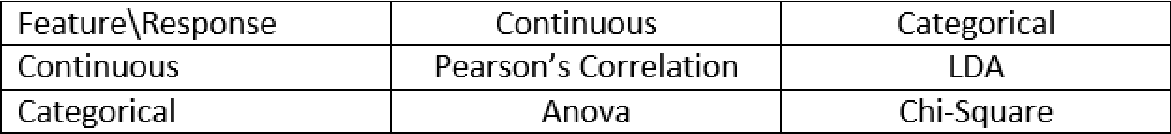

In [163]:
data.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.049502,0.104272,-0.037259,0.190361,0.152956,-0.007672,0.192137,0.075655,0.239810,0.044072,0.160593,-0.089736,-0.011683,-0.000050,0.032198,0.138399,0.092012
BMI,0.049502,1.000000,0.019676,-0.039570,0.016668,0.075499,0.015184,0.134160,0.060215,0.021321,-0.020301,0.187703,-0.117964,0.048080,-0.055475,0.065347,0.042364,-0.028019
Smoking,0.104272,0.019676,1.000000,0.110188,0.058419,0.100279,0.054008,0.114242,0.088723,0.130046,0.076611,0.045502,-0.089498,0.015495,-0.042401,0.014761,0.031739,0.030567
AlcoholDrinking,-0.037259,-0.039570,0.110188,1.000000,-0.022736,-0.022204,0.051615,-0.038813,0.004435,-0.060665,0.044176,-0.062223,0.022578,0.001444,-0.002309,-0.005636,-0.031199,-0.009579
Stroke,0.190361,0.016668,0.058419,-0.022736,1.000000,0.123467,0.024806,0.169367,-0.000398,0.141548,0.002513,0.095502,-0.074304,-0.009319,0.000680,0.033349,0.087286,0.046351
PhysicalHealth,0.152956,0.075499,0.100279,-0.022204,0.123467,1.000000,0.266002,0.388426,-0.050883,0.091191,0.015042,0.128413,-0.193729,-0.030066,-0.098170,0.115921,0.127639,0.032356
MentalHealth,-0.007672,0.015184,0.054008,0.051615,0.024806,0.266002,1.000000,0.103620,-0.126967,-0.224909,0.007395,-0.005618,-0.038571,0.016085,-0.148908,0.106390,0.017350,-0.055115
DiffWalking,0.192137,0.134160,0.114242,-0.038813,0.169367,0.388426,0.103620,1.000000,-0.061097,0.250793,-0.003589,0.184818,-0.258472,-0.042625,-0.051915,0.083835,0.142511,0.063658
Sex,0.075655,0.060215,0.088723,0.004435,-0.000398,-0.050883,-0.126967,-0.061097,1.000000,-0.063318,0.014049,-0.007227,0.039863,-0.012697,-0.015968,-0.062991,-0.005346,0.014105
AgeCategory,0.239810,0.021321,0.130046,-0.060665,0.141548,0.091191,-0.224909,0.250793,-0.063318,1.000000,0.167282,0.200180,-0.124812,0.037493,0.107530,-0.058004,0.125981,0.269211


<Axes: >

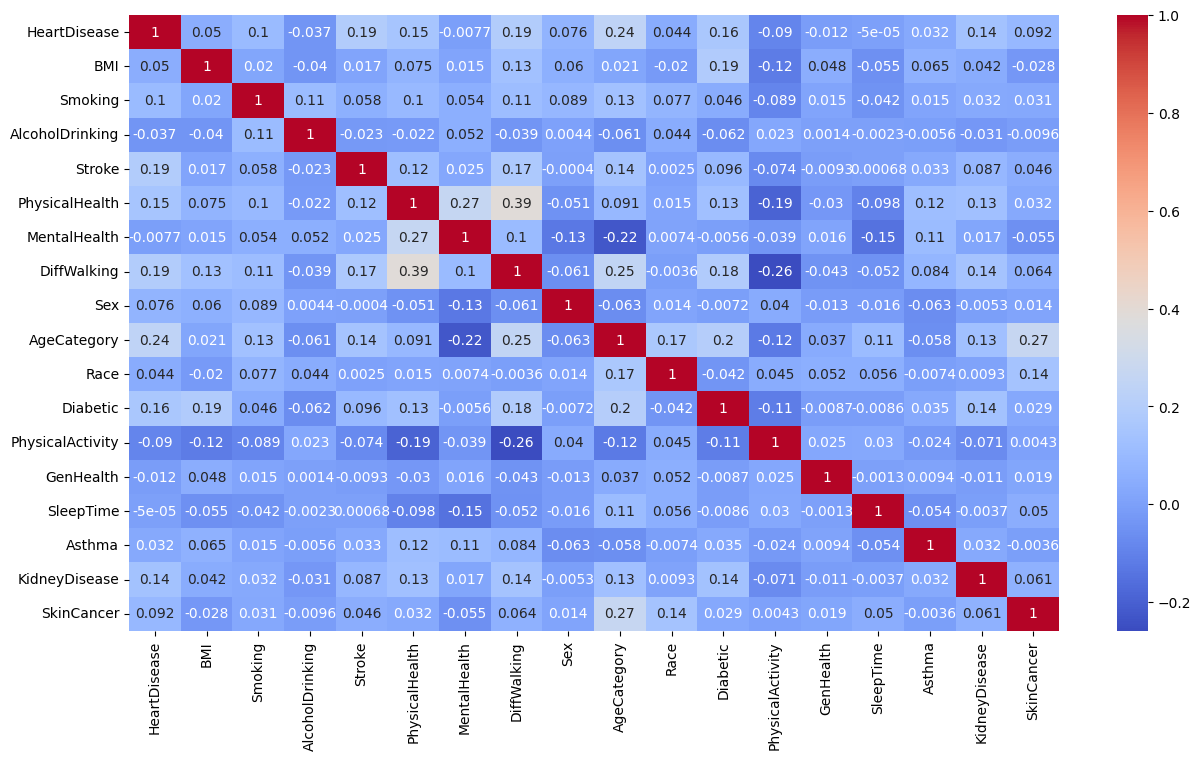

In [164]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm') # Plot the correlation matrix for the dataset

Feature selection using correlation is a process of selecting features that have a strong relationship with the target variable. In this case, we will use the correlation of features with the target variable to select the most important features. The correlation of features with the target variable is also called the correlation of features with the response variable.

In [165]:
# Feature Selection
correlation_matrix = data.corr()
target_variable = 'HeartDisease'
correlation_with_target = correlation_matrix[target_variable].abs().sort_values(ascending=False)
k = 5  # Number of top features to select
selected_features = correlation_with_target[1:k+1].index.tolist()
data_selected = data[selected_features + [target_variable]]
print("Selected Features:")
print(selected_features)

**Chi Square test** is used to determine the relationship between two **categorical variables**. It is used to test the independence of two events. In feature selection, we use it as a metric to select the top n features for the dataset. Used ``chi2`` score function from ``sklearn.feature_selection`` library to select the top 10 features. It returns two arrays, one for the chi-squared values and the other for the p-values. The chi-squared values are used to select the top 10 features.

![Alt text](image-1.png)

In [ ]:
# Feature Selection using chi-square test

X = data2.drop('HeartDisease', axis=1) # Split the dataset into features and target variable
y = data2['HeartDisease']

bestfeatures = SelectKBest(score_func=chi2, k=5) # Select the top 5 features using chi-square test
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  # Naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  # Print the top 5 features

          Features        Score
3           Stroke  9970.747125
6      DiffWalking  9135.086173
12       GenHealth  5437.984671
15   KidneyDisease  5222.341021
4   PhysicalHealth  3301.576186


- The output shows the top 5 features selected by the chi-square test for predicting the 'HeartDisease' target variable. The features are 'Stroke', 'DiffWalking', 'GenHealth', 'KidneyDisease', and 'PhysicalHealth', and their corresponding chi-square scores are shown in the 'Score' column. 
- The chi-square test is a statistical test used to evaluate the relationship between two categorical variables. In feature selection, the chi-square test is used to determine the association between each feature and the target variable. 
- The chi-square test calculates the difference between the observed frequency and the expected frequency of each category in a contingency table. The higher the difference, the higher the chi-square score, indicating a stronger association between the two variables. 
- By using the chi-square test, we can identify the most important features that are associated with the target variable. These features can then be selected for further analysis or used to build a predictive model.
- The higher the chi-square score, the stronger the relationship between the feature and the target variable. Therefore, these features are likely to be the most important predictors of the 'HeartDisease' target variable. 

**ANOVA** is used to determine the relationship between two **continuous variables**. It is used to test the independence of two events. In feature selection, we use it as a metric to select the top n features for the dataset.

In [ ]:
# ANOVA test for feature selection

X = data2.drop('HeartDisease', axis=1) # Split the dataset into features and target variable
y = data2['HeartDisease']

bestfeatures = SelectKBest(score_func=f_classif, k=5) # Select the top 5 features using ANOVA test
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  # Naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  # Print the top 5 features

          Features         Score
6      DiffWalking  10965.411510
3           Stroke  10762.415147
12       GenHealth   6228.773109
4   PhysicalHealth   5915.504735
15   KidneyDisease   5529.714678


Pearson Correlation Coefficient is used to find the correlation between two variables. It has a value between -1 and 1. A value of 1 indicates a perfect positive correlation, and a value of -1 indicates a perfect negative correlation. A value of 0 indicates no correlation at all.

![Alt text](image-3.png)

In [ ]:
# Pearson Correlation for feature selection using selectkbest

X = data.drop('HeartDisease', axis=1) # Split the dataset into features and target variable
y = data['HeartDisease']

bestfeatures = SelectKBest(score_func=f_regression, k=5) # Select the top 5 features using Pearson Correlation
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  # Naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  # Print the top 5 features

          Features         Score
8      AgeCategory  17532.422698
6      DiffWalking  10965.411510
3           Stroke  10762.415147
10        Diabetic   7565.149923
4   PhysicalHealth   5915.504735


The Pearson correlation coeffcient measures the linear relationship two continuous variables. In this case, the script is using it to evaluate the relationship between each feature and the target variable. The higher the Pearson correlation score, the stronger the linear relationship between the feature and the target variable.

``Chi-square:``
- Suitable for categorical data
- Measures the association between two categorical variables
- Can be used to identify the most important features for predicting a categorical target variable
- Does not assume a linear relationship between variables

``Pearson correlation:``
- Suitable for continuous data
- Measures the linear relationship between two continuous variables
- Can be used to identify the most important features for predicting a continuous target variable
- Assumes a linear relationship between variables

``ANOVA:``
- Suitable for continuous data with categorical groups
- Measures the difference in means between two or more groups
- Can be used to identify the most important features for predicting a categorical or continuous target variable
- Assumes normality and homogeneity of variance

## Experiment 5 - PCA

In [ ]:
# Now Reduce dimensionality of this dataset using Principal Component Analysis.

from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-0.454557,-1.766326,-0.669112,2.123983,2.406490
1,-5.518711,-1.616389,-0.212009,-1.110372,1.276582
2,-2.465089,1.201587,-0.840046,2.398257,0.721750
3,-4.496400,0.308645,-0.319580,-0.531726,0.432879
4,2.315852,-1.751782,-0.696855,0.446536,0.797076
...,...,...,...,...,...
286731,-1.314060,2.421528,1.266032,-0.657023,0.668243
286732,6.578075,2.271329,0.708897,-1.570816,0.570771
286733,-1.509800,1.469371,1.544095,1.421957,-0.131377
286734,3.584861,-1.731912,1.540817,-0.176213,-0.539084


In [ ]:
# Calculate variance of each principal component
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.5850953 , 0.10426556, 0.06587564, 0.06115134, 0.04487082])

These ratio are often called the **explained variance** of the components. The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 30-dimensional space to 2-dimensional space, you lose some of the variance (information) when you do this.

Here, used ``standard_scaler`` to standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. Then, used ``PCA`` to reduce the dimensionality of the dataset to 2 principal components. 

By using the attribute ``explained_variance_ratio_``, you can see that the first principal component contains 58.48% of the variance and the second principal component contains 10.41% of the variance. Together, the two components contain 68.89% of the information.

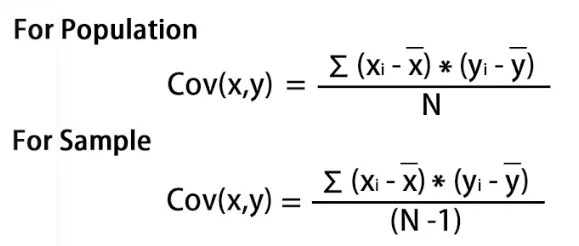

https://medium.com/analytics-vidhya/understanding-principle-component-analysis-pca-step-by-step-e7a4bb4031d9

<BarContainer object of 5 artists>

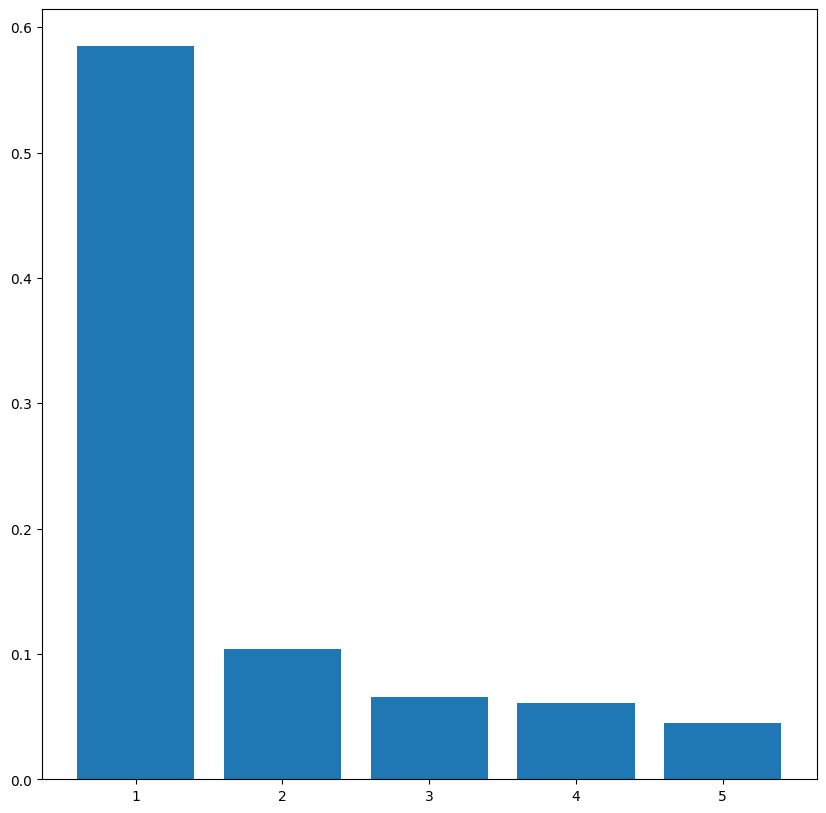

In [ ]:
# Visualize the principal components
plt.figure(figsize=(10,10))
plt.bar(range(1,6), explained_variance, label='Explained Variance')

Var(X) = sum((X - mu)^2) / (n - 1)
where:
- X is a randorn variable
- nu is the mean of x
- n is the number of observations